<a href="https://colab.research.google.com/github/sami-shiraz2/Deep-learning/blob/master/Face_and_Eye_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [2]:
!mkdir Sportsman_Classification_Project

In [41]:
import numpy as np
import pandas as pd
import seaborn
import cv2
import matplotlib.pyplot as plt

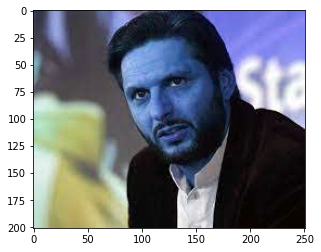

In [44]:
img = cv2.imread('/content/Sportsman_Classification_Project/dataset/shahid afridi/2Q__ (12).jpg')
plt.imshow(img)

In [45]:
g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g

array([[ 74,  71,  66, ..., 157, 157, 157],
       [ 74,  71,  66, ..., 158, 158, 158],
       [ 74,  71,  66, ..., 159, 159, 159],
       ...,
       [210, 212, 214, ...,   4,   4,   4],
       [210, 212, 214, ...,   4,   4,   4],
       [211, 212, 213, ...,   4,   4,   4]], dtype=uint8)

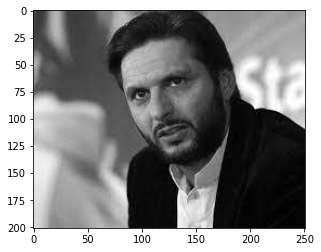

In [46]:
plt.imshow(g, cmap='gray')

In [48]:
f_cascade =  cv2.CascadeClassifier('/content/Sportsman_Classification_Project/opencv/haarcascade_frontalface_default.xml')
e_cascade = cv2.CascadeClassifier('/content/Sportsman_Classification_Project/opencv/haarcascade_eye.xml')

fac = f_cascade.detectMultiScale(g, 1.3, 5)
fac

array([[ 69,  34, 101, 101]], dtype=int32)

In [49]:
(x,y,w,h) = fac[0]
x,y,w,h

(69, 34, 101, 101)

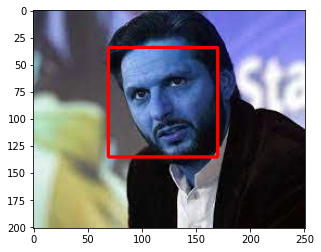

In [50]:
fac_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(fac_img)

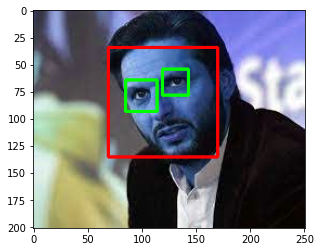

In [54]:
cv2.destroyAllWindows()
for (x,y,w,h) in fac:
    fac_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = g[y:y+h, x:x+w]
    roi_color = fac_img[y:y+h, x:x+w]
    eyes = e_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(fac_img, cmap='gray')
plt.show()

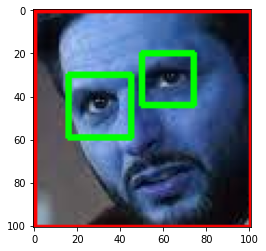

In [55]:
plt.imshow(roi_color, cmap='gray')

In [64]:
def crop_image_if_2_eye(image_path):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = f_cascade.detectMultiScale(gray, 1.3, 5)
  for (x,y,w,h) in faces: 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = e_cascade.detectMultiScale(roi_gray)
    if(len(eyes)) >= 2:
      return roi_color

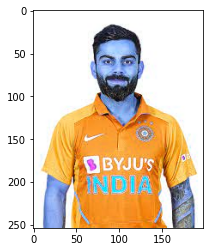

In [65]:
original_image = cv2.imread('/content/Sportsman_Classification_Project/dataset/virat kholi/2Q__ (11).jpg')
plt.imshow(original_image, cmap='gray')

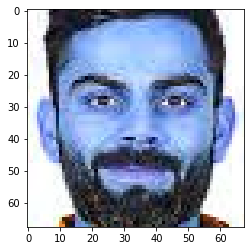

In [66]:
crop_image = crop_image_if_2_eye('/content/Sportsman_Classification_Project/dataset/virat kholi/2Q__ (11).jpg')
plt.imshow(crop_image, cmap='gray')

In [67]:
path_to_data = "/content/Sportsman_Classification_Project/dataset/" 
path_to_cr_data = "/content/Sportsman_Classification_Project/dataset/cropped/"

In [70]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [71]:
img_dirs

['/content/Sportsman_Classification_Project/dataset/.ipynb_checkpoints',
 '/content/Sportsman_Classification_Project/dataset/babar azam',
 '/content/Sportsman_Classification_Project/dataset/shahid afridi',
 '/content/Sportsman_Classification_Project/dataset/mesi',
 '/content/Sportsman_Classification_Project/dataset/virat kholi',
 '/content/Sportsman_Classification_Project/dataset/maria sharapova']

In [73]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)